In [1]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="yPxTqVksfS2howisPzXsspPdp",
                        project_name="test", workspace="silvercraft")


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/silvercraft/test/c9a4cd98f260432fa886f80f539245d2



In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

import numpy as np
import pandas as pd


Using TensorFlow backend.


In [4]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [40]:
from os import listdir
from os.path import isfile, isdir, join
features=[]
mypath1 = "C:/Users/andy/test/music_wav"
files = listdir(mypath1)
for f in files:
    fullpath = join(mypath1,f)
    label = "music"
    features.append([fullpath, label])
mypath2 = "C:/Users/andy/test/speech_wav"
files = listdir(mypath2)
for f in files:
    fullpath = join(mypath2,f)
    label = "speech"
    features.append([fullpath, label])



In [92]:
features = np.array(features)

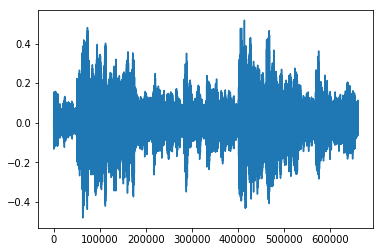

In [42]:
fn = features[0][0]
librosa_audio, librosa_sample_rate = librosa.load(fn)
plt.plot(librosa_audio)

In [44]:
for i in range(128):
    experiment.log_audio(audio_data = features[1][0], metadata = {"name":features[i][1]},sample_rate = 22050)

{'web': 'https://www.comet.ml/api/asset/download?assetId=fbae05350d02448a917847b97fa185d3&experimentKey=c9a4cd98f260432fa886f80f539245d2',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=fbae05350d02448a917847b97fa185d3&experimentKey=c9a4cd98f260432fa886f80f539245d2',
 'assetId': 'fbae05350d02448a917847b97fa185d3'}

COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded
COMET ERROR: File could not be uploaded


In [47]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

COMET ERROR: File could not be uploaded


In [50]:
features_pls = []
for i in range(128):
    data = extract_features(features[i][0])
    label = features[i][1]
    features_pls.append([data,label])


In [52]:
featuresdf = pd.DataFrame(features_pls, columns=['feature','class_label'])

In [54]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [61]:
# split the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)
num_labels = yy.shape[1]
filter_size = 2
def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')    
    return model

model = build_model_graph()

In [63]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE
COMET INFO: Ignoring automatic log_parameter('do_validation') because 'keras:do_validation' is in COMET_LOGGING_PARAMETERS_IGNORE


Train on 102 samples, validate on 26 samples
Epoch 1/100
 32/102 [========>.....................] - ETA: 9s - loss: 15.8889 - accuracy: 0.4688

COMET INFO: Ignoring automatic log_metric('batch_batch') because 'keras:batch_batch' is in COMET_LOGGING_METRICS_IGNORE
COMET INFO: Ignoring automatic log_metric('batch_size') because 'keras:batch_size' is in COMET_LOGGING_METRICS_IGNORE


102/102 [==============================] - 4s 44ms/step - loss: 16.3105 - accuracy: 0.4608 - val_loss: 5.8584 - val_accuracy: 0.5000
Epoch 2/100
102/102 [==============================] - 0s 981us/step - loss: 14.1486 - accuracy: 0.5490 - val_loss: 5.7244 - val_accuracy: 0.4615
Epoch 3/100
102/102 [==============================] - 0s 961us/step - loss: 11.5201 - accuracy: 0.6078 - val_loss: 5.1742 - val_accuracy: 0.6154
Epoch 4/100
102/102 [==============================] - 0s 981us/step - loss: 10.0206 - accuracy: 0.5588 - val_loss: 4.4278 - val_accuracy: 0.6538
Epoch 5/100
102/102 [==============================] - 0s 824us/step - loss: 10.0321 - accuracy: 0.6275 - val_loss: 2.1921 - val_accuracy: 0.7692
Epoch 6/100
102/102 [==============================] - 0s 716us/step - loss: 7.0911 - accuracy: 0.5882 - val_loss: 2.9467 - val_accuracy: 0.6154
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 6.6699 - accuracy: 0.6176 - val_loss: 1.8891 - val_accuracy: 0.

102/102 [==============================] - 0s 746us/step - loss: 0.9143 - accuracy: 0.8235 - val_loss: 0.8391 - val_accuracy: 0.9231
Epoch 58/100
102/102 [==============================] - 0s 608us/step - loss: 0.9049 - accuracy: 0.8529 - val_loss: 0.8994 - val_accuracy: 0.9231
Epoch 59/100
102/102 [==============================] - 0s 510us/step - loss: 0.6208 - accuracy: 0.8725 - val_loss: 0.9695 - val_accuracy: 0.8846
Epoch 60/100
102/102 [==============================] - 0s 657us/step - loss: 1.4141 - accuracy: 0.8333 - val_loss: 0.8954 - val_accuracy: 0.8846
Epoch 61/100
102/102 [==============================] - 0s 667us/step - loss: 1.0488 - accuracy: 0.8333 - val_loss: 0.7782 - val_accuracy: 0.9615
Epoch 62/100
102/102 [==============================] - 0s 736us/step - loss: 0.8662 - accuracy: 0.8627 - val_loss: 0.7213 - val_accuracy: 0.9615
Epoch 63/100
102/102 [==============================] - 0s 726us/step - loss: 0.8776 - accuracy: 0.8235 - val_loss: 0.7029 - val_accuracy

In [65]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 98.04%
Testing Accuracy: 96.15%


In [114]:
p = extract_features("C:/Users/andy/test\\whitelotus_vocal2.wav").reshape(1,40)
a = model.predict(p)
if(a[0][0]>a[0][1]):
    print("music")
else:
    print("speech")

music


In [112]:
a


array([[9.9999952e-01, 4.6202956e-07]], dtype=float32)